In [10]:
# face detection,verification and analysis using DeepFace

In [1]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=9951fe73727d88f032a757bc70b44d9f2590c0791d8e6863580ed5e8262f6f21
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [49]:
# Finding faces

In [2]:
! pip install retina-face

Directory  /root /.deepface created
Directory  /root /.deepface/weights created
retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:02<00:00, 43.0MB/s]


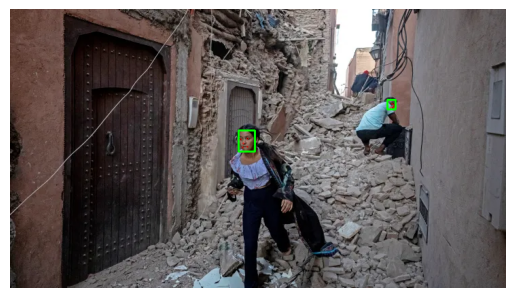

False

In [3]:
from retinaface import RetinaFace
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np

img_path = "/im1.png"
img = cv2.imread(img_path)

resp = RetinaFace.detect_faces(img_path, threshold = 0.1)
#print(resp)

def int_tuple(t):
    return tuple(int(x) for x in t)

for key in resp:
    identity = resp[key]

    #---------------------
    confidence = identity["score"]

    rectangle_color = (0, 255, 0)

    landmarks = identity["landmarks"]
    diameter = 1
    cv2.circle(img, int_tuple(landmarks["left_eye"]), diameter, (0, 0, 255), 1)
    cv2.circle(img, int_tuple(landmarks["right_eye"]), diameter, (0, 0, 255), 1)
    cv2.circle(img, int_tuple(landmarks["nose"]), diameter, (0, 0, 255), 1)
    cv2.circle(img, int_tuple(landmarks["mouth_left"]), diameter, (0, 0, 255), 1)
    cv2.circle(img, int_tuple(landmarks["mouth_right"]), diameter, (0, 0, 255), 1)

    facial_area = identity["facial_area"]

    cv2.rectangle(img, (facial_area[2], facial_area[3]), (facial_area[0], facial_area[1]), rectangle_color, 2)
    facial_img = img[facial_area[1]: facial_area[3], facial_area[0]: facial_area[2]]
    plt.imshow(facial_img[:, :, ::-1])

plt.imshow(img[:, :, ::-1])
plt.axis('off')
plt.show()
cv2.imwrite('outputs/'+img_path.split("/")[1], img)


In [74]:
#face verification

In [45]:
# similarity between two faces pictures

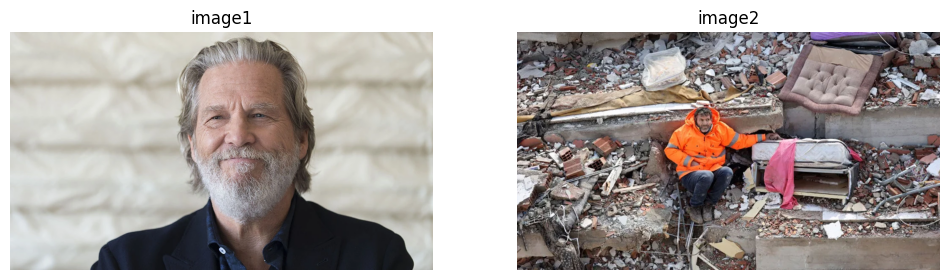

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:10<00:00, 54.7MB/s]


facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:01<00:00, 48.2MB/s]


facenet512_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: /root/.deepface/weights/facenet512_weights.h5
100%|██████████| 95.0M/95.0M [00:01<00:00, 56.0MB/s]


openface_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/openface_weights.h5
To: /root/.deepface/weights/openface_weights.h5
100%|██████████| 15.3M/15.3M [00:00<00:00, 39.9MB/s]


VGGFace2_DeepFace_weights_val-0.9034.h5 will be downloaded...


Downloading...
From: https://github.com/swghosh/DeepFace/releases/download/weights-vggface2-2d-aligned/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
To: /root/.deepface/weights/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
100%|██████████| 511M/511M [00:09<00:00, 51.2MB/s]


arcface_weights.h5  will be downloaded to  /root/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5
100%|██████████| 137M/137M [00:02<00:00, 50.7MB/s]


,verified,distance,threshold,model,detector_backend,similarity_metric,facial_areas,time
0,True,0.379796,0.40,VGG-Face,opencv,cosine,"{'img1': {'x': 404, 'y': 95, 'w': 272, 'h': 27...",21.82
1,False,0.639292,0.40,Facenet,opencv,cosine,"{'img1': {'x': 404, 'y': 95, 'w': 272, 'h': 27...",10.69
2,False,0.736000,0.30,Facenet512,opencv,cosine,"{'img1': {'x': 404, 'y': 95, 'w': 272, 'h': 27...",9.60
3,False,1.179350,0.10,OpenFace,opencv,cosine,"{'img1': {'x': 404, 'y': 95, 'w': 272, 'h': 27...",6.47
4,False,0.328269,0.23,DeepFace,opencv,cosine,"{'img1': {'x': 404, 'y': 95, 'w': 272, 'h': 27...",84.97
5,False,0.844821,0.68,ArcFace,opencv,cosine,"{'img1': {'x': 404, 'y': 95, 'w': 272, 'h': 27...",9.67


In [4]:
import pandas as pd
from deepface import DeepFace
import matplotlib.pyplot as plt
from PIL import Image
im1 = Image.open("/km.png")
im2 = Image.open("/Hope-fades-in-Turkey-Syria-with-time-running-out-on-the-buried.jpg")

# Create a subplot with two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image in the first column
axes[0].imshow(im1)
axes[0].set_title("image1")

# Display the prediction image in the second column
axes[1].imshow(im2)
axes[1].set_title("image2")

# Remove axis ticks and labels for a cleaner display
for ax in axes:
    ax.axis("off")

# Show the images side by side
plt.show()




models = [
    "VGG-Face",
    "Facenet",
    "Facenet512",
    "OpenFace",
    "DeepFace",
    "ArcFace"
]

# Initialize an empty DataFrame
result_df = pd.DataFrame()

for model in models:
    # Perform face verification
    result = DeepFace.verify(
        img1_path="/km.png",
        img2_path="/Hope-fades-in-Turkey-Syria-with-time-running-out-on-the-buried.jpg",
        model_name=model
    )

    # Append the result to the DataFrame
    result_df = result_df.append(result, ignore_index=True)

# Display the final DataFrame
result_df


In [42]:
# Analyse face (age,gender,race,emotion)

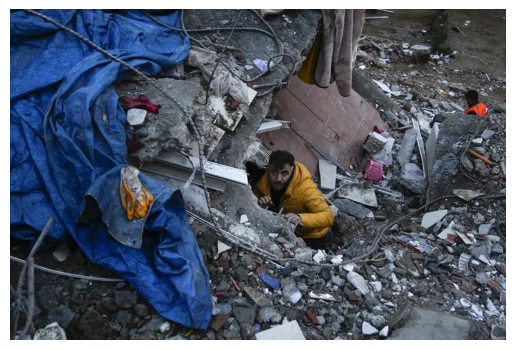

Action: emotion: 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]


,age,dominant_gender,dominant_race,dominant_emotion
0,45,Man,indian,neutral


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

image_path = "/veri.png"
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (if necessary)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()



# The list of dictionaries
objs = DeepFace.analyze(image_path, actions=['age', 'gender', 'race', 'emotion'])

# Initialize an empty DataFrame
analyse_df = pd.DataFrame()

# Select specific columns from each dictionary and append them to the DataFrame
for obj in objs:
    selected_data = {
        'age': obj['age'],
        'dominant_gender': obj['dominant_gender'],
        'dominant_race': obj['dominant_race'],
        'dominant_emotion': obj['dominant_emotion']
    }
    analyse_df = analyse_df.append(selected_data, ignore_index=True)

# Display the DataFrame
analyse_df
